# Atypical country

In [2]:
dataset_meta = DatasetMeta(SchemaName.NETFLIX, NetflixDatasetName.DATASET1)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA (adults only),4,TV Dramas,In a future where the elite inhabit an island ...
2,2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA (adults only),93,International Movies,After a devastating earthquake hits Mexico Cit...
3,3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R (adults only),78,International Movies,"When an army recruit is found dead, his fellow..."
4,4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13 (13+ children),80,Independent Movies,"In a postapocalyptic world, rag-doll robots hi..."
5,5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13 (13+ children),123,Dramas,A brilliant group of students become card-coun...


In [3]:
actions_lst = [
        FilterAction(filtered_column=Column('listed_in'), filter_operator=FilterOperator.EQUAL,
                 filter_term='Dramas'),  
        GroupAction(grouped_column=Column('rating'), aggregated_column=Column('show_id'),
                    aggregation_function=AggregationFunction.COUNT),
        BackAction(),
        BackAction(),
        FilterAction(filtered_column=Column('release_year'), filter_operator=FilterOperator.EQUAL,
                 filter_term='1962'),  
        BackAction(),
        FilterAction(filtered_column=Column('country'), filter_operator=FilterOperator.EQUAL,
                 filter_term='India'), 
        FilterAction(filtered_column=Column('release_year'), filter_operator=FilterOperator.EQUAL,
                 filter_term='2017'),  
        GroupAction(grouped_column=Column('type'), aggregated_column=Column('show_id'),
                    aggregation_function=AggregationFunction.COUNT),
]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

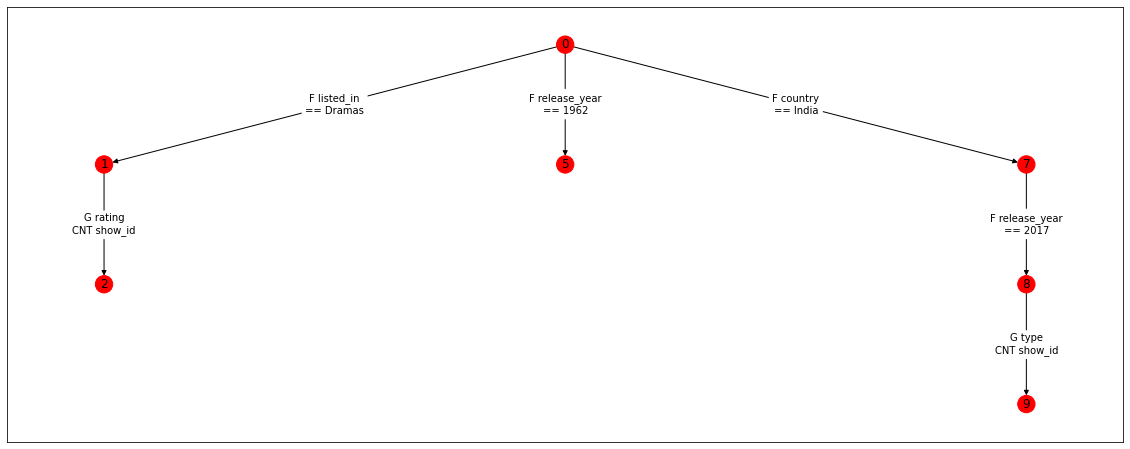

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Filter listed_in == Dramas</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5,5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13 (13+ children),123,Dramas,A brilliant group of students become card-coun...
8,8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R (adults only),119,Dramas,After one of his high school students attacks ...
171,171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...",Canada,"December 15, 2019",2016,R (adults only),110,Dramas,A ruthless corporate headhunter battles his ri...
233,233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",1988,TV-14 (14+ children),95,Dramas,"After reckless teens kill an Amish child, a pr..."
296,296,Movie,Across Grace Alley,Ralph Macchio,"Ben Hyland, Marsha Mason, Karina Smirnoff, Col...",United States,"December 1, 2016",2013,TV-PG (older children),24,Dramas,"A young boy, upset by his parents' divorce, be..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7416,7416,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,"July 24, 2017",2015,PG-13 (13+ children),110,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join..."
7421,7421,Movie,Villain,Philip Barantini,"Craig Fairbrass, George Russo, Robert Gleniste...",United Kingdom,"September 5, 2020",2020,R (adults only),97,Dramas,"Fresh out of prison, an ex-con tries to save h..."
7448,7448,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",2018,TV-MA (adults only),99,Dramas,A young man in foster care finds his voice in ...
7464,7464,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",2016,R (adults only),109,Dramas,An unhappy father and lawyer quits his suburba...


### Query 2: <span style="color:DimGray">Filter listed_in == Dramas AND</span> <span style="color:blue;">Group by rating CNT(show_id)</span>

In [6]:
display(prepare_display(action_execution_result_lst, 1))

,show_id
rating,
R (adults only),38
PG-13 (13+ children),27
TV-MA (adults only),25
TV-14 (14+ children),9
PG (older children),8
TV-PG (older children),8
NR (not rated),1


### Query 5: <span style="color:blue;">Filter release_year == 1962</span>

In [7]:
display(prepare_display(action_execution_result_lst, 4))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3708,3708,Movie,Lolita,Stanley Kubrick,"James Mason, Shelley Winters, Peter Sellers, S...",United Kingdom,"November 1, 2019",1962,R (adults only),153,Classic Movies,"In this black comedy, an English professor mar..."
4301,4301,Movie,Mutiny on the Bounty,"Lewis Milestone, Carol Reed","Marlon Brando, Trevor Howard, Richard Harris, ...",United States,"November 1, 2019",1962,TV-PG (older children),185,Action & Adventure,Marlon Brando gives a nuanced performance as t...
4982,4982,Movie,Professor,Lekh Tandon,"Shammi Kapoor, Kalpana, Lalita Pawar, Parveen ...",India,"July 1, 2017",1962,TV-PG (older children),163,International Movies,A college grad in need of money must disguise ...


### Query 7: <span style="color:blue;">Filter country == India</span>

In [8]:
display(prepare_display(action_execution_result_lst, 6))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14 (14+ children),118,International Movies,"When a doctor goes missing, his psychiatrist w..."
10,10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA (adults only),143,International Movies,An architect and his wife move into a castle t...
19,19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14 (14+ children),124,Independent Movies,"On India's Independence Day, a zany mishap in ..."
21,21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",2018,TV-14 (14+ children),110,International Movies,After accidentally connecting over the Interne...
22,22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",2018,TV-14 (14+ children),128,International Movies,"A taxi driver, a gangster and an athlete strug..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7765,7765,Movie,Zero,Aanand Rai,"Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...",India,"May 21, 2019",2018,TV-14 (14+ children),159,International Movies,Through his relationships with two wildly diff...
7770,7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14 (14+ children),154,International Movies,Three friends on an adventurous road trip/bach...
7777,7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,"November 1, 2018",2011,PG (older children),104,Children & Family Movies,"When his cruel uncle abandons him, a young orp..."
7781,7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA (adults only),94,International Movies,A drug dealer starts having doubts about his t...


### Query 8: <span style="color:DimGray">Filter country == India AND</span> <span style="color:blue;">Filter release_year == 2017</span>

In [9]:
display(prepare_display(action_execution_result_lst, 7))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
23,23,Movie,​Maj Rati ​​Keteki,Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,"September 15, 2018",2017,TV-14 (14+ children),117,International Movies,A successful writer returns to the town that l...
24,24,Movie,​Mayurakshi,Atanu Ghosh,"Soumitra Chatterjee, Prasenjit Chatterjee, Ind...",India,"September 15, 2018",2017,TV-14 (14+ children),100,International Movies,When a middle-aged divorcee returns to Kolkata...
265,265,Movie,Aadu 2,Midhun Manuel Thomas,"Jayasurya, Vinayakan, Sunny Wayne, Vijay Babu,...",India,"May 15, 2018",2017,TV-MA (adults only),150,International Movies,When Shaji Pappan and his gang of goofy outlaw...
313,313,Movie,Aditi Mittal: Things They Wouldn't Let Me Say,Fazila Allana,Aditi Mittal,India,"July 18, 2017",2017,TV-MA (adults only),63,Stand-Up Comedy,Trailblazing comic Aditi Mittal mixes topical ...
316,316,Movie,Adrishya,Sandeep Chatterjee,"Ravi Kumar, Ayesha Singh, Nishat Mallick, Arch...",India,"December 31, 2019",2017,TV-14 (14+ children),99,International Movies,A family’s harmonious existence is interrupted...
...,...,...,...,...,...,...,...,...,...,...,...,...
7071,7071,Movie,Thug Life,Mukesh Vohra,"Harish Verma, Jass Bajwa, Rajiv Thakur, Ihana ...",India,"December 1, 2019",2017,TV-14 (14+ children),133,International Movies,A get-rich-quick scheme goes awry when a group...
7088,7088,Movie,Tikli and Laxmi Bomb,Aditya Kripalani,"Vibhawari Deshpande, Chitrangada Chakraborty, ...",India,"August 1, 2018",2017,TV-MA (adults only),151,International Movies,Two frustrated sex workers cut out the middlem...
7131,7131,Movie,Toilet: Ek Prem Katha,Shree Narayan Singh,"Akshay Kumar, Bhumi Pednekar, Divyendu Sharma,...",India,"August 21, 2018",2017,TV-14 (14+ children),145,International Movies,"On her first day of marriage, a woman leaves h..."
7374,7374,Movie,Urvi,Pradeep Verma,"Sruthi Hariharan, Shraddha Srinath, Shweta Pan...",India,"January 15, 2018",2017,TV-MA (adults only),121,International Movies,After getting tricked into working at a brothe...


### Query 9: <span style="color:DimGray">Filter country == India AND Filter release_year == 2017 AND</span> <span style="color:blue;">Group by type CNT(show_id)</span>

In [10]:
display(prepare_display(action_execution_result_lst, 8))

,show_id
type,
Movie,101
TV Show,3
